In [1]:
import gzip

import hist
from skhep_testdata import data_path

import pylhe

In [2]:
def plot(data):
    lheevents = pylhe.read_lhe_file(data).events
    events = pylhe.to_awkward(lheevents)
    mass_hist = hist.Hist.new.Reg(30, 50, 150).Weight()
    mass_hist.fill(
        (events.particles.vector[:, -1] + events.particles.vector[:, -2]).mass,
        weight=events.eventinfo.weight,
    )
    artists = mass_hist.plot()
    ax = artists[0].stairs.axes
    ax.set_yscale("log")
    ax.set_xlabel("Mass [GeV]")
    ax.set_ylabel("Count")

In [3]:
lhe_data = data_path("pylhe-drell-yan-ll-lhe.gz")
with gzip.open(lhe_data) as f:
    for _ in range(1000):
        print(f.readline())

b'<LesHouchesEvents version="3.0">\n'
b'<header>\n'
b'<!--\n'
b'#*********************************************************************\n'
b'#                                                                    *\n'
b'#                        MadGraph5_aMC@NLO                           *\n'
b'#                                                                    *\n'
b'#                           Going Beyond                             *\n'
b'#                                                                    *\n'
b'#                   http://madgraph.hep.uiuc.edu                     *\n'
b'#                   http://madgraph.phys.ucl.ac.be                   *\n'
b'#                   http://amcatnlo.cern.ch                          *\n'
b'#                                                                    *\n'
b'#                     The MadGraph5_aMC@NLO team                     *\n'
b'#                                                                    *\n'
b'#.......................

In [4]:
lhe_file = pylhe.read_lhe_file(lhe_data)
print(
    pylhe.write_lhe_string(
        lhe_file.init, [lhe_file.events.__next__() for i in range(5)]
    )
)

<LesHouchesEvents version="3.0">
<init>
   2212   2212  6.5000000e+03  6.5000000e+03     0     0  247000  247000    -4     1
 1.6782100e+03  5.1789220e+00  1.6782100e+03     1
<initrwgt>
  <weightgroup name="Central scale variation" combine="envelope">
    <weight id="1" MUR="0.5" MUF="0.5" PDF="247000">MUR=0.5 MUF=0.5</weight>
    <weight id="2" MUR="0.5" MUF="0.5" DYN_SCALE="1" PDF="247000">MUR=0.5 MUF=0.5 dyn_scale_choice=sum pt</weight>
    <weight id="3" MUR="0.5" MUF="0.5" DYN_SCALE="2" PDF="247000">MUR=0.5 MUF=0.5 dyn_scale_choice=HT</weight>
    <weight id="4" MUR="0.5" MUF="0.5" DYN_SCALE="3" PDF="247000">MUR=0.5 MUF=0.5 dyn_scale_choice=HT/2</weight>
    <weight id="5" MUR="0.5" MUF="0.5" DYN_SCALE="4" PDF="247000">MUR=0.5 MUF=0.5 dyn_scale_choice=sqrts</weight>
    <weight id="6" MUR="0.5" MUF="1.0" PDF="247000">MUR=0.5</weight>
    <weight id="7" MUR="0.5" MUF="1.0" DYN_SCALE="1" PDF="247000">MUR=0.5 dyn_scale_choice=sum pt</weight>
    <weight id="8" MUR="0.5" MUF="1.0" DY

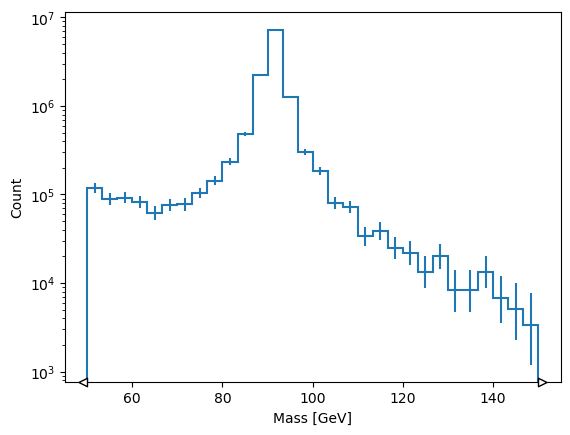

In [5]:
plot(lhe_data)

In [6]:
# events were consumed so reload here
lhe_file = pylhe.read_lhe_file(lhe_data)


def filtered(events):
    for e in events:
        for p in e.particles:
            # only keep Z bosons
            if p.id == 23:
                yield e


pylhe.write_lhe_file(lhe_file.init, filtered(lhe_file.events), "filtered.lhe.gz")

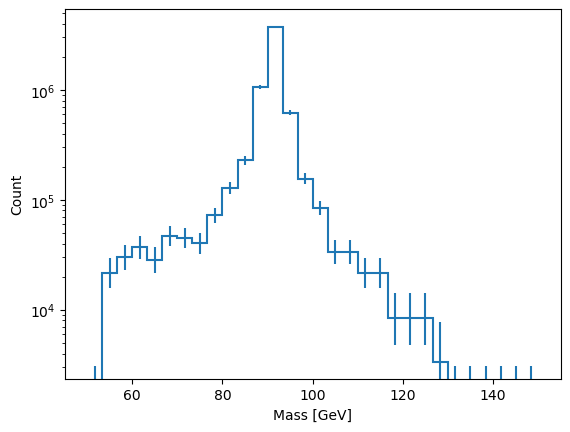

In [7]:
# continue with modified lhe, rivet, pythia ,...
plot("filtered.lhe.gz")